# Importing Libraries


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler 

In [9]:
# This option ensures the graph created are displayed in this notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Dataframe


In [12]:
 # Defining path
path = r'C:\Users\swapn\World Happiness Report'

In [14]:
# Importing dataframe 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'exploring relationship_dataset.csv'), index_col = False)

In [16]:
df.head()

,Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Donations to Charity,Happiness Status
0,1,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy Country
1,2,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy Country
2,3,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy Country
3,4,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy Country
4,5,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy Country


In [18]:
df.shape

(1359, 12)

# Data Cleaning


In [20]:
# Remove the categorical columns such as Country, Region, Continent, and Happiness Status
# Create a subset to hold the remaining numerical columns
df_subset = df.drop(columns = ['Country', 'Region', 'Happiness Status'])

In [22]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1359 non-null   int64  
 1   Year                           1359 non-null   int64  
 2   Happiness Score                1359 non-null   float64
 3   Economy (GDP per Capita)       1359 non-null   float64
 4   Family (Social Support)        1359 non-null   float64
 5   Health (Life Expectancy)       1359 non-null   float64
 6   Freedom (Life Choices)         1359 non-null   float64
 7   Trust (Government Corruption)  1359 non-null   float64
 8   Donations to Charity           1359 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 95.7 KB


In [24]:
# Check for dulicates
df_dup = df.duplicated()

In [26]:
df_dup.shape

(1359,)

In [28]:
column2 = ['Country Rank','Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom (Life Choices)', 'Trust (Government Corruption)', 'Generosity (Donations to Charity)']


In [30]:
#Defining Scaler 
scaler = StandardScaler()

In [32]:
#Scaling data subset 
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=column2) 

In [34]:
df_scaled.head()


,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity)
0,-1.714824,-1.572076,1.919351,0.843860,0.920138,1.454889,1.370441,2.555870,0.882756
1,-1.692145,-1.572076,1.896104,0.635210,1.079254,1.481020,1.135375,0.081752,2.113694
2,-1.669467,-1.572076,1.865706,0.686514,0.953549,1.182614,1.267025,3.122909,1.276335
3,-1.646788,-1.572076,1.861235,0.982288,0.864122,1.225704,1.397014,2.069189,1.325742
4,-1.624109,-1.572076,1.776297,0.688308,0.838951,1.308947,1.162203,1.753980,2.306116


In [36]:
df_subset.head()


,Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Donations to Charity
0,1,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# The Elbow Technique


In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [41]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 
# Creates a score that represents  the rate of variation for the given cluster option.
score

C:\Users\swapn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\swapn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

[-12231.0,
 -8158.903592215958,
 -6752.491962036862,
 -6004.513436366116,
 -5506.794726897108,
 -5129.940752063661,
 -4746.413789080232,
 -4489.417134802521,
 -4473.5933810088145]

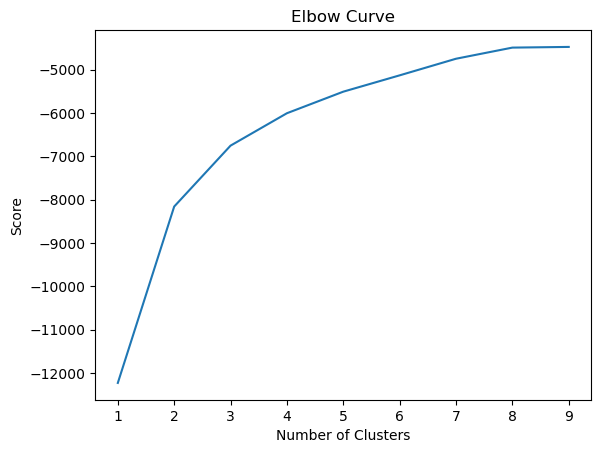

In [43]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [47]:
# The results of this elbow curve show that after 3, the curve gradually plateaus. In this scenario, the optimal cluster count for this analysis is 3.


# K-Means Clustering


In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [55]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
# On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [57]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)


C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [59]:
df_scaled.head()


,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),clusters
0,-1.714824,-1.572076,1.919351,0.843860,0.920138,1.454889,1.370441,2.555870,0.882756,0
1,-1.692145,-1.572076,1.896104,0.635210,1.079254,1.481020,1.135375,0.081752,2.113694,0
2,-1.669467,-1.572076,1.865706,0.686514,0.953549,1.182614,1.267025,3.122909,1.276335,0
3,-1.646788,-1.572076,1.861235,0.982288,0.864122,1.225704,1.397014,2.069189,1.325742,0
4,-1.624109,-1.572076,1.776297,0.688308,0.838951,1.308947,1.162203,1.753980,2.306116,0


In [61]:
df_scaled['clusters'].value_counts()


clusters
2    630
1    507
0    222
Name: count, dtype: int64

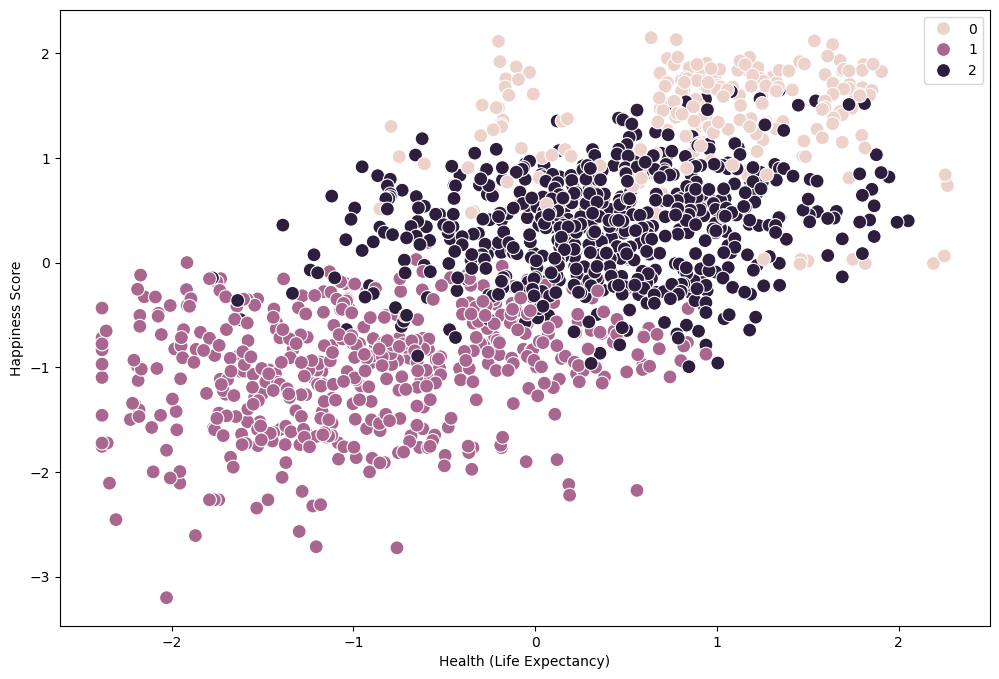

In [63]:
# Plot the clusters for the "Happiness Score" and "Health (Life Expectancy)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Health (Life Expectancy)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

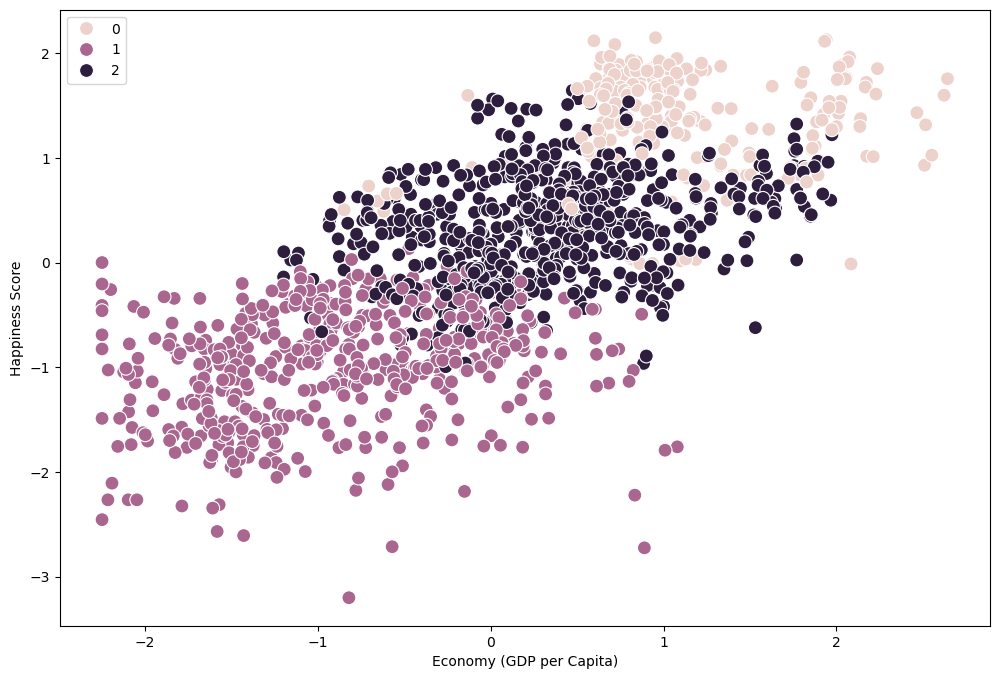

In [65]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Economy (GDP per Capita)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

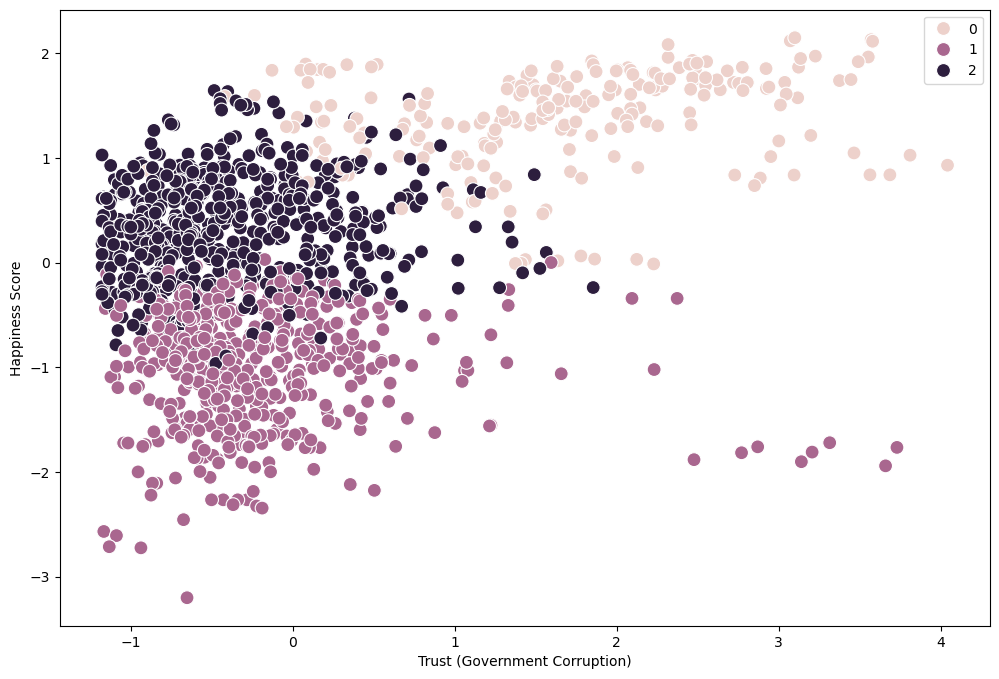

In [67]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Trust (Government Corruption)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

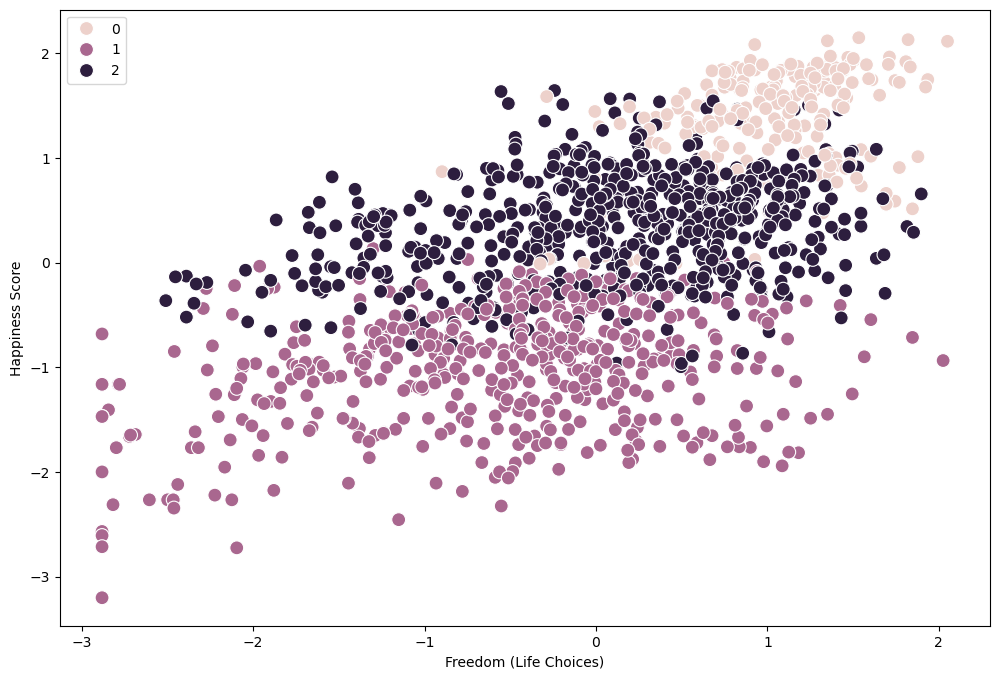

In [69]:
# Plot the clusters for the "Happiness Score" and "Freedom (Life Choices)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Freedom (Life Choices)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom (Life Choices)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

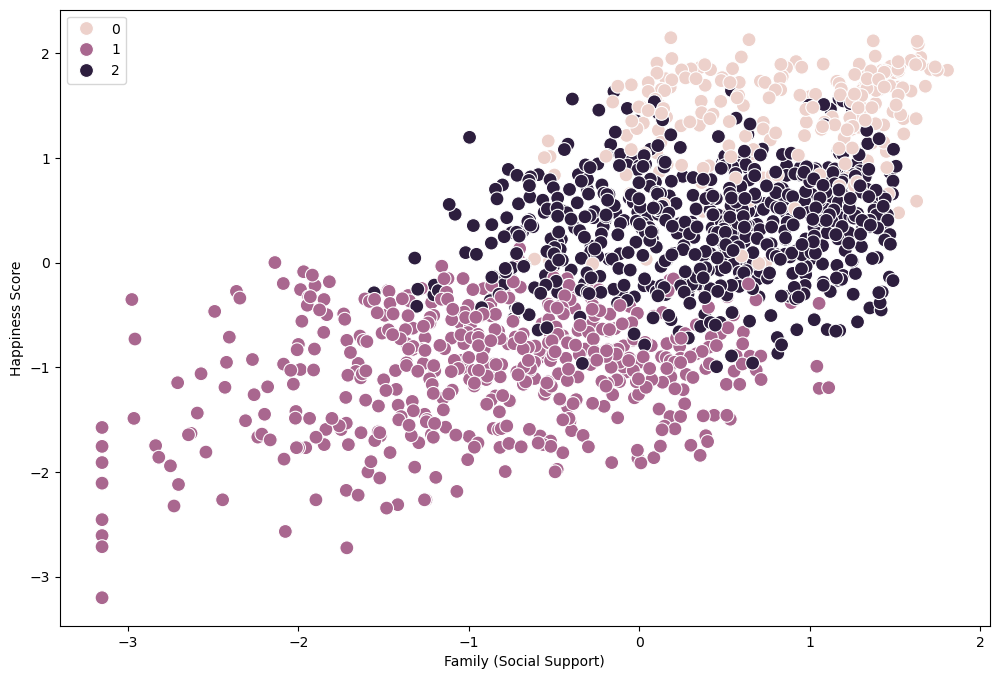

In [71]:
# Plot the clusters for the "Happiness Score" and "Family (Social Support)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Family (Social Support)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family (Social Support)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

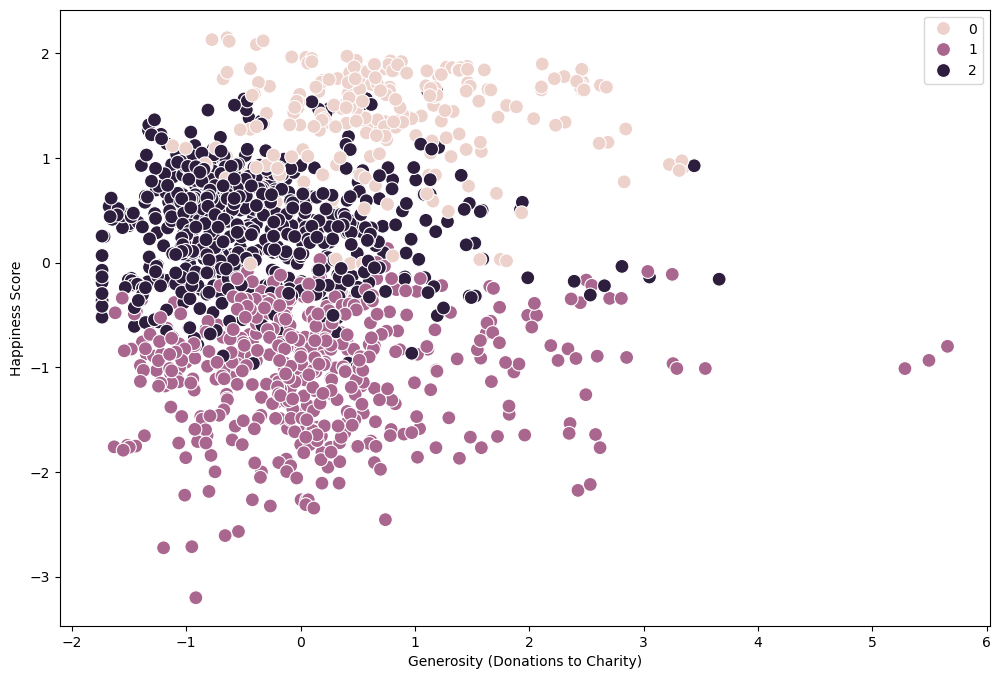

In [73]:
# Plot the clusters for the "Happiness Score" and "Family (Social Support)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Generosity (Donations to Charity)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity (Donations to Charity)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

In [ ]:
# Interpreting Results from Scatterplots
# Happiness Score vs. Economy: The higer the economy score the higher the happiness score. The pink cluster (coded as "0" in the legend) is showing that a lower score in economy will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an economy score lower than 1 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score above 1 have an economy score higher than 1 equates to a "happy country".
# Happiness Score vs. Trust Government Corruption: The pink cluster (coded as "1" in the legend) is showing that the "unhappy countries" do not have much trust in their government. "Somewhat happy countries" (purple cluster) are also within the same range of a Trust score between -1 - 0 (Low trust in government). We see a slight difference in countries with "happy countries" (dark purple cluster) demonstrating slightly more trust in their government with data points varying between 0 - 2.
# Happiness Score vs. Freedom (Life Choices): This result of this scatterplot were not shocking. The purple cluster (coded as "1" in the legend) is showing the "somewhat happy countries" have freedom scores that range between -1 through 1. The dark purple cluster (coded as "2" in the legend) is showing that "happy countries" have slightly more freedom than those countries with lower happiness scores. The pink cluster (coded as "0" in the legend) is showing that "unhappy countries" don't have differences in Freedom scores in comparison to the purple cluster (Somewhat happy countries).
# Happiness Score vs. Health (Life Expectancy): The higer the health score the higher the happiness score. The pink cluster (coded as "0" in the legend) is showing that a lower score in health will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an health score between -1 and 2 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score above 0 have an health score higher than 1 equates to a "happy country".
# Happiness Score vs. Family (Social Support): The pink cluster (coded as "0" in the legend) is showing that a lower score in Family or Social support will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an Family score lower than 1.5 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score have an family score a bit higher than "somewhat happy countries."

# Descriptive Statistics


In [75]:
# Create a 'cluster' column based on the clusters for easier interpretation

df_subset.loc[df_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_scaled['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [81]:
df_subset.groupby('cluster').agg({'Rank':['mean', 'median'],
                        'Economy (GDP per Capita)':['mean', 'median'], 
                         'Family (Social Support)':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom (Life Choices)':['mean', 'median'], 
                          'Trust (Government Corruption)':['mean', 'median'], 
                          'Donations to Charity':['mean', 'median']})

Rank        Economy (GDP per Capita)            \
                   mean median                     mean    median   
cluster                                                             
dark purple   60.219048   60.0                 1.167122  1.153393   
pink          17.941441   14.0                 1.514799  1.454500   
purple       122.676529  124.0                 0.608655  0.591683   

            Family (Social Support)           Health (Life Expectancy)  \
                               mean    median                     mean   
cluster                                                                  
dark purple                1.174574  1.197465                 0.682036   
pink                       1.320967  1.343715                 0.813691   
purple                     0.762187  0.776230                 0.363052   

                      Freedom (Life Choices)            \
               median                   mean    median   
cluster                                                  
dark purple  0.685397               0.466541  0.485000   
pink         0.818046               0.608848  0.615265   
purple       0.353248               0.362640  0.382000   

            Trust (Government Corruption)           Donations to Charity  \
                                     mean    median                 mean   
cluster                                                                    
dark purple                      0.087630  0.075605             0.154087   
pink                             0.317127  0.316235             0.284329   
purple                           0.106751  0.089000             0.211346   

                     
             median  
cluster              
dark purple  0.1340  
pink         0.2715  
purple       0.2000

In [83]:
# The dark purple cluster has the best statistics: Especially the Economy score has a median score of 1.4 which is higher than the other clusters.
# Freedom, Trust is following the same pattern as Economy, which means, dark purple is higher, then purple and pink. However, Family (Social Support) is interesting: purple cluster is a bit higher than dark purple. If you consider that the more economically developed countries are generally more individualized, then that is a bit understandable.
# Generosity Score is showing that it doesn't relate to much to Happiness score.
# Some limitations in this dataset are that the dataset is not that large. It will be interesting to see how this data evolves over the next decade.
